<a href="https://colab.research.google.com/github/lokeshkumarn/Notebooks/blob/master/Anthropic_Claude3_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install anthropic IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.6/851.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [13]:
import os

In [18]:
import base64
from anthropic import Anthropic
client = Anthropic(api_key=os.environ.get("ANTHROPIC_API_KEY"))
MODEL_NAME = "claude-3-opus-20240229"

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

In [11]:
!wget https://i.stack.imgur.com/SemNn.png

--2024-04-01 07:29:37--  https://i.stack.imgur.com/SemNn.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.52.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87345 (85K) [image/png]
Saving to: ‘SemNn.png’

SemNn.png           100%[===================>]  85.30K  --.-KB/s    in 0.01s   

2024-04-01 07:29:37 (6.23 MB/s) - ‘SemNn.png’ saved [87345/87345]



In [4]:
!pwd

/content


In [5]:
!ls -l

total 92
-rw-r--r-- 1 root root 87345 Dec 25  2019 code.png
drwxr-xr-x 1 root root  4096 Mar 28 23:00 sample_data


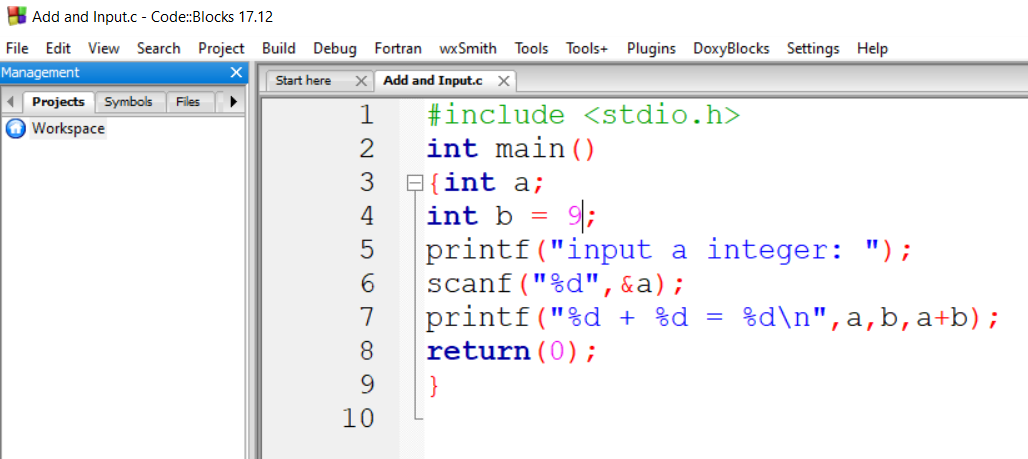

In [6]:
from IPython.display import Image
Image(filename='code.png')

In [8]:
base_encoded_code_png = get_base64_encoded_image("code.png")

In [19]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image",
             "source": {"type": "base64",
                        "media_type": "image/png",
                        "data": base_encoded_code_png}
             },
            {"type": "text",
             "text": "Transcribe the code in the answer. Only output the code."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

#include <stdio.h>
int main()
{
    int a;
    int b = 9;
    printf("input a integer: ");
    scanf("%d",&a);
    printf("%d + %d = %d\n",a,b,a+b);
    return(0);
}
